#How does player ranking correlate with match wins?


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/benediktas/dev/University/data-science/tennis/tennis_atp/tennis_atpatp_matches_combined.csv")

In [18]:
ranking_df = df.dropna(subset=["winner_rank", "loser_rank"]).copy()
ranking_df.shape

(122230, 49)

In [19]:
ranking_df["higher_rank_won"] = ranking_df["winner_rank"] < ranking_df["loser_rank"]

In [20]:
ranking_df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'higher_rank_won'],
      dtype='object')

In [21]:
proportion = ranking_df["higher_rank_won"].mean()

print(proportion)

0.6536120428699992


In [22]:
ranking_df["rank_dif"] = ranking_df["loser_rank"] - ranking_df["winner_rank"]
ranking_df.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,higher_rank_won,rank_dif
0,1986-301,Auckland,Hard,32,A,1986-01-06,28,100452,NaN,NaN,...,NaN,NaN,NaN,NaN,180.0,NaN,146.0,NaN,False,-34.0
1,1986-301,Auckland,Hard,32,A,1986-01-06,31,101185,NaN,NaN,...,NaN,NaN,NaN,NaN,127.0,NaN,43.0,NaN,False,-84.0
2,1986-301,Auckland,Hard,32,A,1986-01-06,30,101185,NaN,NaN,...,NaN,NaN,NaN,NaN,127.0,NaN,180.0,NaN,True,53.0


In [23]:
upsets_df = ranking_df[ranking_df["higher_rank_won"] == False].copy()
upsets_df["difference_in_ranks"] = upsets_df["winner_rank"] - upsets_df["loser_rank"]

In [24]:
upsets_df.head(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,higher_rank_won,rank_dif,difference_in_ranks
0,1986-301,Auckland,Hard,32,A,1986-01-06,28,100452,NaN,NaN,...,NaN,NaN,NaN,180.0,NaN,146.0,NaN,False,-34.0,34.0
1,1986-301,Auckland,Hard,32,A,1986-01-06,31,101185,NaN,NaN,...,NaN,NaN,NaN,127.0,NaN,43.0,NaN,False,-84.0,84.0
7,1986-301,Auckland,Hard,32,A,1986-01-06,24,100551,NaN,NaN,...,NaN,NaN,NaN,146.0,NaN,89.0,NaN,False,-57.0,57.0


In [25]:
row = upsets_df.loc[711.000000]
print(row)

tourney_id                  1986-306
tourney_name                    Bari
surface                         Clay
draw_size                         32
tourney_level                      A
tourney_date              1986-04-07
match_num                         22
winner_id                     100598
winner_seed                      NaN
winner_entry                     NaN
winner_name            Wolfgang Popp
winner_hand                        R
winner_ht                      183.0
winner_ioc                       GER
winner_age                      26.8
loser_id                      100395
loser_seed                       NaN
loser_entry                      NaN
loser_name              Victor Pecci
loser_hand                         R
loser_ht                       193.0
loser_ioc                        PAR
loser_age                       30.4
score                    3-6 6-1 6-3
best_of                            3
round                            R16
minutes                          NaN
w

In [26]:
difference_in_ranks_std = upsets_df["difference_in_ranks"].std()
print(difference_in_ranks_std)

upsets_df["difference_in_ranks"].describe()
# upsets_df["difference_in_ranks"].max()

101.3823671484821


count    42339.000000
mean        66.647677
std        101.382367
min          0.000000
25%         16.000000
50%         36.000000
75%         75.000000
max       1711.000000
Name: difference_in_ranks, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

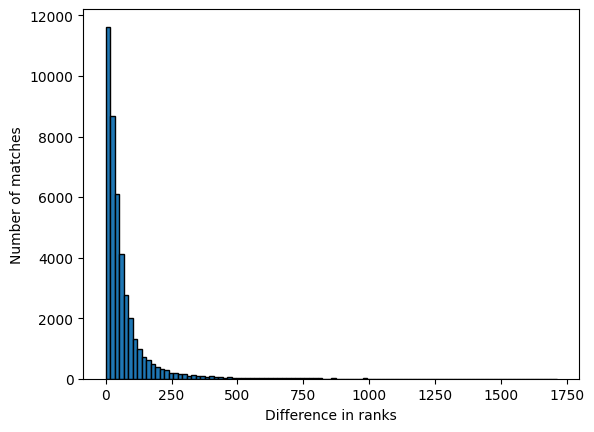

In [ ]:
plt.hist(upsets_df["difference_in_ranks"], bins=100, edgecolor="black") #for explanation maybe put range[200]
plt.xlabel("Difference in ranks")
plt.ylabel("Number of matches")
plt.show()

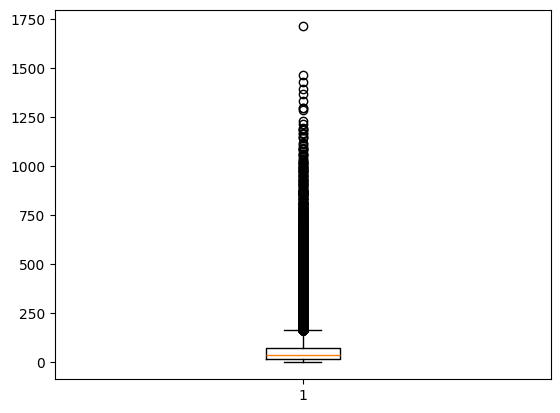

In [28]:
plt.boxplot(upsets_df["difference_in_ranks"])
plt.show()

In [29]:
row = upsets_df.loc[upsets_df["difference_in_ranks"] == 1711]
print(row["loser_name"])
print(row["winner_name"])

107834    Gerald Melzer
Name: loser_name, dtype: object
107834    Pablo Andujar
Name: winner_name, dtype: object


In [30]:
#Looking at it without outliers

Q1 = upsets_df["difference_in_ranks"].quantile(0.25)
Q3 = upsets_df["difference_in_ranks"].quantile(0.75)

IQR = Q3 - Q1

In [31]:
lower_bound = Q1 - 1.5 * IQR
higher_bound = Q3 + 1.5 * IQR

In [32]:
upsets_df_no_outliers = upsets_df[(upsets_df["difference_in_ranks"] > lower_bound) & (upsets_df["difference_in_ranks"] < higher_bound)]
upsets_df_no_outliers .tail(3)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,higher_rank_won,rank_dif,difference_in_ranks
126163,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,395,211663,8.0,NaN,...,13.0,7.0,11.0,145.0,409.0,20.0,2355.0,False,-125.0,125.0
126164,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,394,210530,5.0,NaN,...,15.0,0.0,1.0,122.0,493.0,48.0,1136.0,False,-74.0,74.0
126165,2024-7696,Next Gen Finals,Hard,8,F,2024-12-18,392,211663,8.0,NaN,...,10.0,10.0,15.0,145.0,409.0,122.0,493.0,False,-23.0,23.0


Text(0.5, 1.0, 'difference_in_ranks_no_outliers')

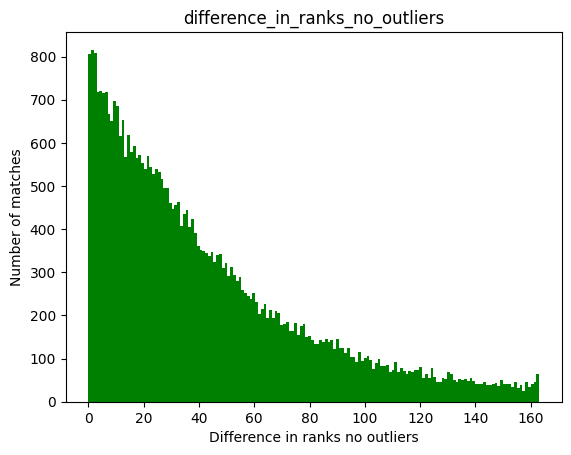

In [35]:
plt.hist(upsets_df_no_outliers["difference_in_ranks"], bins=162, color="green")
plt.xlabel("Difference in ranks no outliers")
plt.ylabel("Number of matches")
plt.title("difference_in_ranks_no_outliers")

In [34]:
upsets_df_no_outliers["difference_in_ranks"].describe()

count    38693.000000
mean        42.810560
std         36.713366
min          0.000000
25%         14.000000
50%         32.000000
75%         61.000000
max        163.000000
Name: difference_in_ranks, dtype: float64